In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
# Gruvbox theme for jupyter (can be deleted)
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd', context='notebook', ticks=True, grid=True)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [2]:
# Average velocity calculator
def v(N, probability):
    t = 0 # Time in seconds
    dist = 0 # Distance in meters
    for i in range(0,N):
        # Jump
        t+=1        # 1 second for jumping
        dist += 0.3 # move for 0.3 meters
        # random.random() returns value from 0 to 1
        if random.random() <= probability: # if cracked the leg, wait 30 seconds
            t+=30
    return dist/t   # calculate average velocity

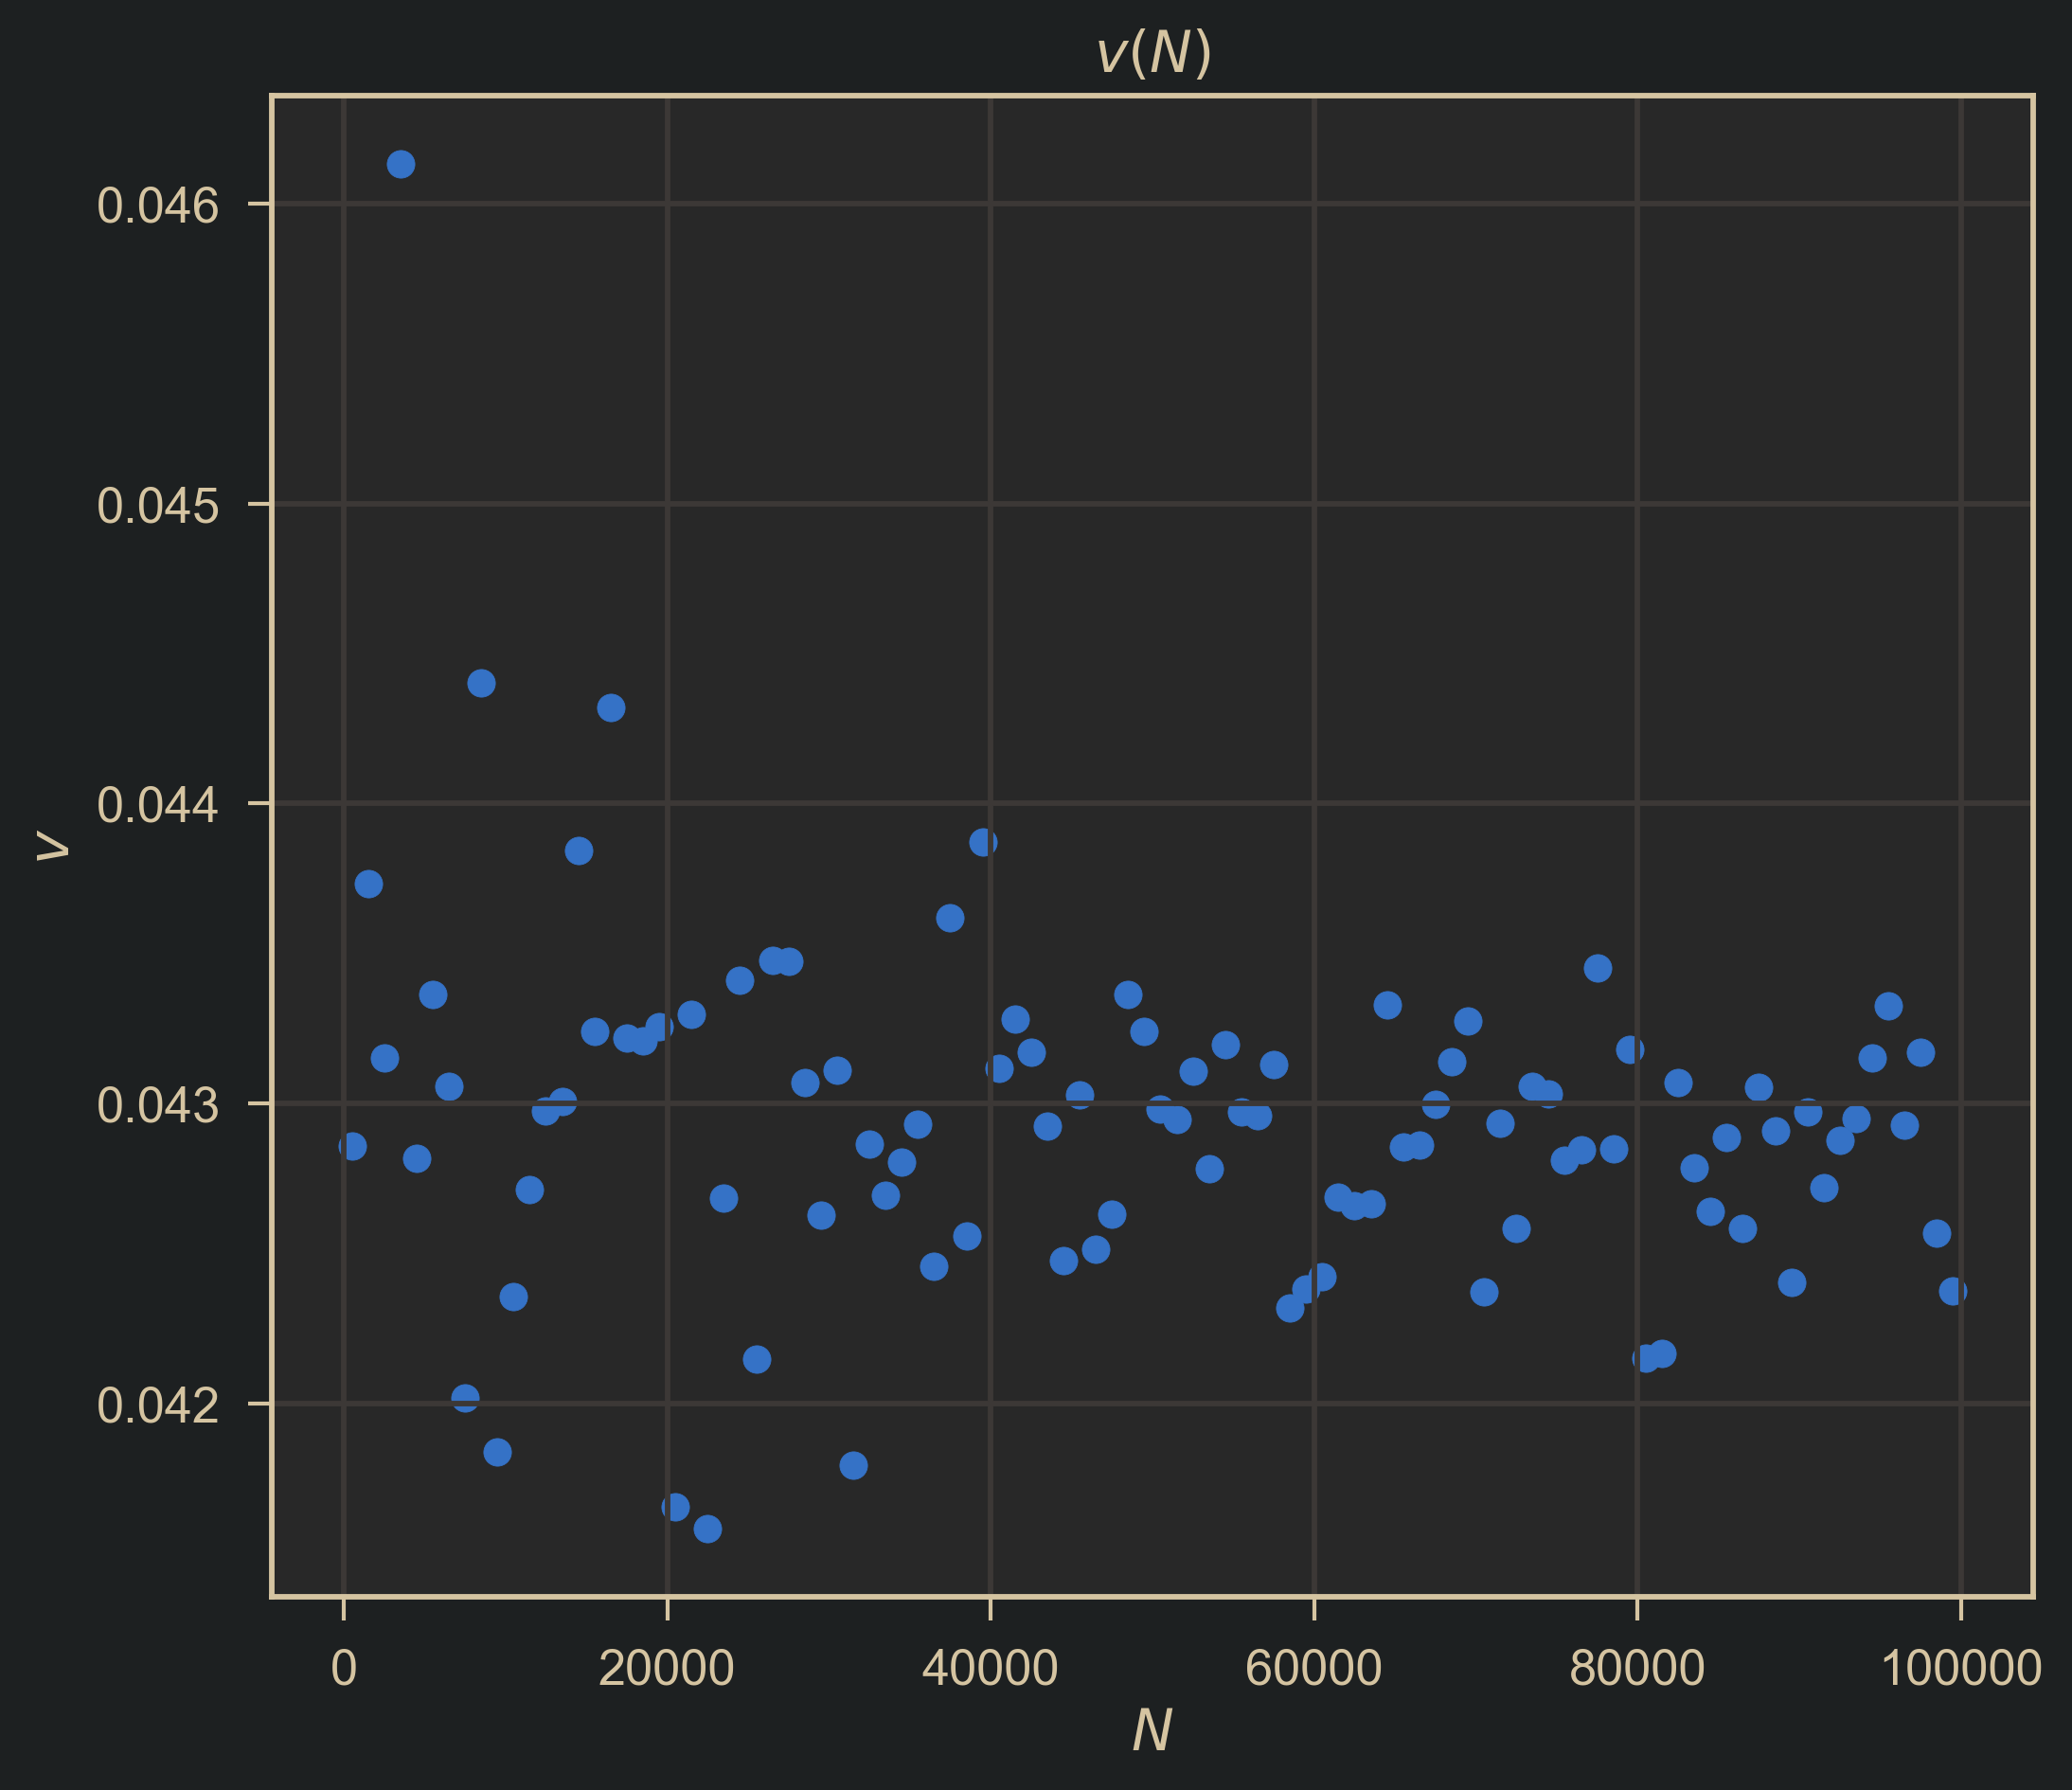

In [8]:
## First task - function velocity(amount of jumps) 
N = 100
x = []
x = [i*1000+500 for i in range(N)] 
    
# Graph
v = np.vectorize(v)
vs = v(x, 0.2)
plt.title("$v(N)$")
plt.ylabel('$v$')
plt.xlabel('$N$')
plt.plot(x, vs)

# Expected velocity is 0.3/(1 + 30*0.2) = 0.04285 m/s
# The more jumps there is, the more velocity goes to this value.

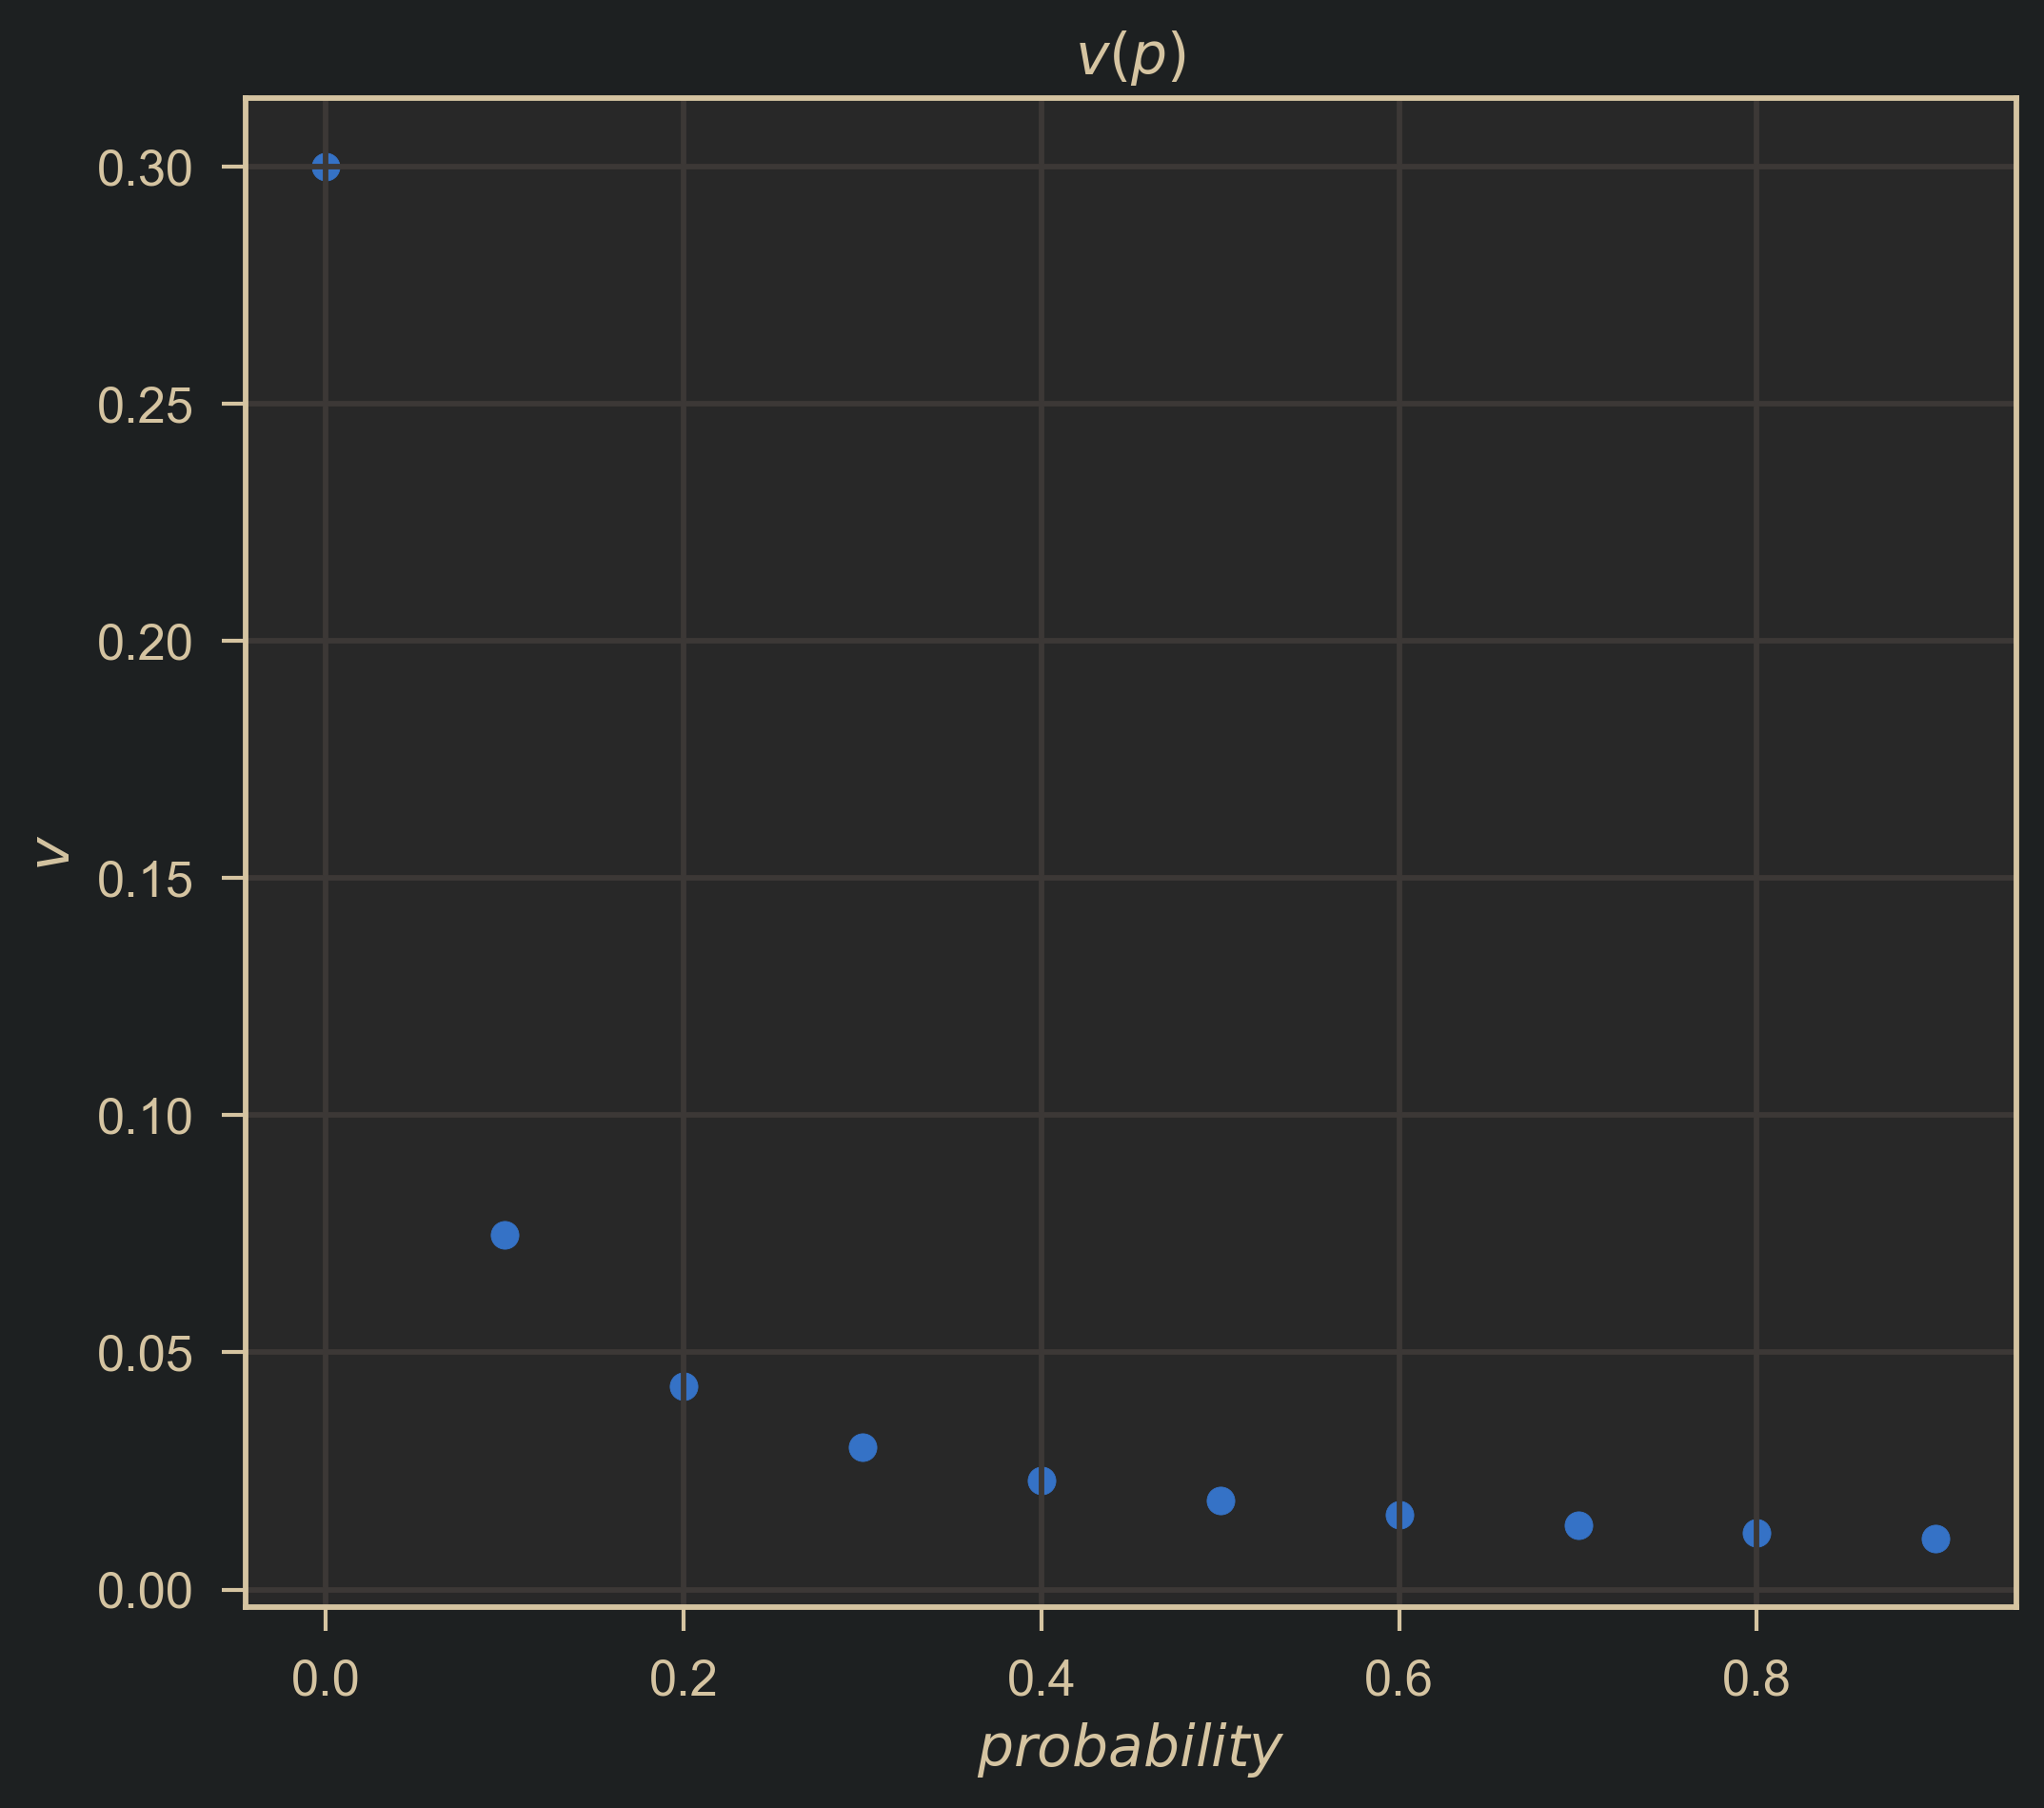

In [11]:
## Second task - function velocity(probability) 
x = np.arange(0, 1, 0.1)
x1 = np.arange(0, 1, 0.01)
vtest = lambda x: 0.3/(1+30*x)

# Graph
v = np.vectorize(v)
vs = v(100000, x)
vtestgr = vtest(x1)
plt.title("$v(p)$")
plt.ylabel('$v$')
plt.xlabel('$probability$')
# plt.plot(x1, vtestgr)
plt.scatter(x, vs)

# Dependancy is shown on the graph. We can see that average velocity falls very fast with increase of
#probability of cracking. When p -> 0, than v -> 0.3; when p -> 1, than v -> 0.00967742

In [9]:
## Third task - broken horse
def brokenV(N):
    t = 0 # Time in seconds
    dist = 0 # Distance in meters
    for i in range(0,N):
        # Jump
        t+=1
        if random.random() <= 0.3:
            dist += 0.15
        else:
            dist += 0.3
        
        if random.random() <= 0.2: # if cracked the leg, wait 30 seconds
            t+=30
    return dist/t

brokenV(5000000) # Result - average velocity: 0.0364 m/s
eps = 0
for i in range(0,10):
    eps+=abs(brokenV(5000000)-0.036429)

In [6]:
## Fourth task - mad horse
def madV(N):
    t = 0 # Time in seconds
    dist = 0 # Distance in meters
    for i in range(0,N):
        # Jump
        t+=1
        if random.random() <= 0.3:
            dist += 0.15
            if random.random() <= 0.2: # if cracked the leg, wait 30 seconds
                t+=30
        else:
            dist += 0.3
            if random.random() <= 0.3: # if cracked the leg, wait 30 seconds
                t+=30
        
    return dist/t

madV(5000000) # Result - average velocity: 0.028 m/s

0.028030189664200372

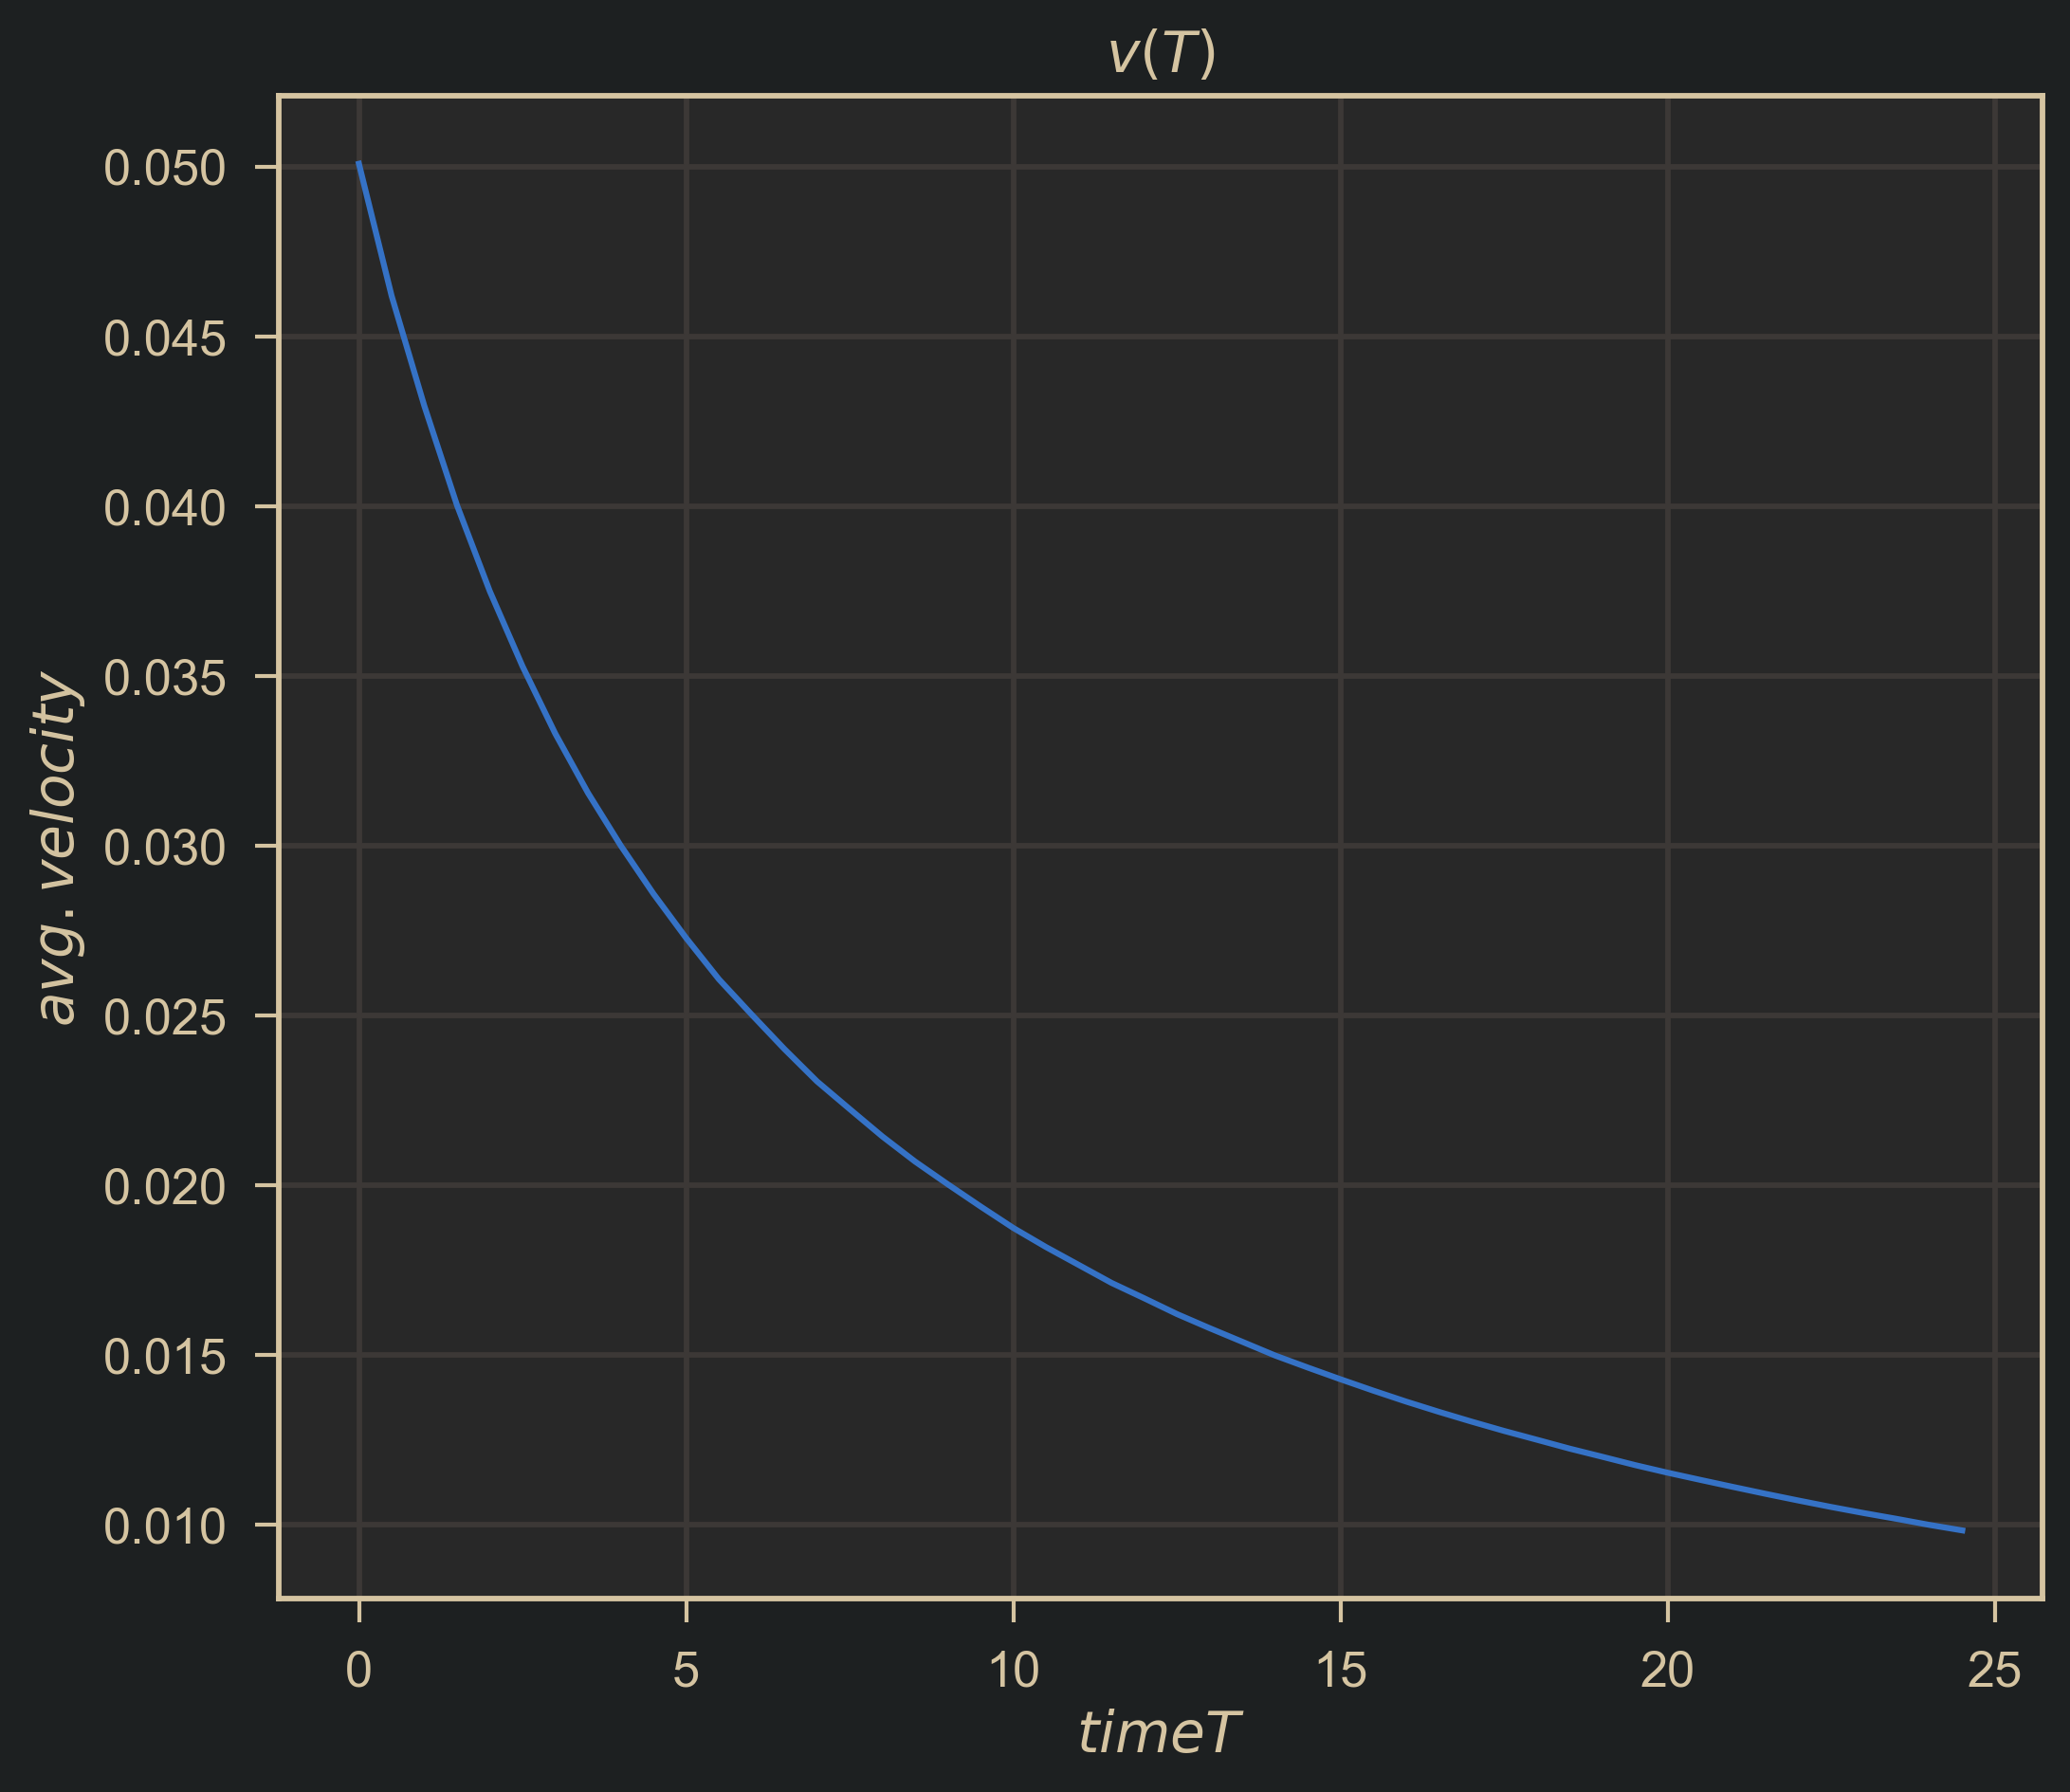

In [15]:
## Fifth task - jumping every time T
# Average velocity calculator
def v5(N, T):
    t = 0 # Time in seconds
    dist = 0 # Distance in meters
    for i in range(0, N):
        # Jump
        t+=T
        dist += 0.3
        
        if random.random() <= 0.2: # if cracked the leg, wait 30 seconds
            t+=30
    return dist/t

# Graph - average velocity dependancy by T
T = np.arange(0, 25, 0.5)
v5 = np.vectorize(v5)
vs = v5(2000000, T)
plt.title("$v(T)$")
plt.ylabel('$avg. velocity$')
plt.xlabel('$time T$')
plt.plot(T, vs)

# From the graph, when T -> 0, than v -> ~0.05, as expected, because average time is 0.2*30=6 seconds
#per jump, average distance is 0.3, velocity = 0.3/6=0.05 m/s